<a href="https://colab.research.google.com/github/pranathi66666/Rice-leaf-disease-detection-/blob/main/rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/rice_leaf_diseases'


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the data into training and validation sets
)

In [ ]:
train_set = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify the subset as training
)

Found 96 images belonging to 3 classes.


In [ ]:
val_set = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify the subset as validation
)

Found 24 images belonging to 3 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_set, epochs=10, validation_data=val_set)

Epoch 1/10
3/3 [==============================] - 33s 13s/step - loss: 3.7131 - accuracy: 0.2917 - val_loss: 1.6387 - val_accuracy: 0.3333
Epoch 2/10
3/3 [==============================] - 15s 4s/step - loss: 1.2733 - accuracy: 0.3438 - val_loss: 1.1188 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 15s 4s/step - loss: 1.1552 - accuracy: 0.3542 - val_loss: 1.0941 - val_accuracy: 0.3750
Epoch 4/10
3/3 [==============================] - 14s 4s/step - loss: 1.2177 - accuracy: 0.3646 - val_loss: 1.0154 - val_accuracy: 0.5417
Epoch 5/10
3/3 [==============================] - 15s 5s/step - loss: 1.0497 - accuracy: 0.4271 - val_loss: 0.9202 - val_accuracy: 0.6250
Epoch 6/10
3/3 [==============================] - 15s 4s/step - loss: 1.0038 - accuracy: 0.5521 - val_loss: 0.9361 - val_accuracy: 0.4583
Epoch 7/10
3/3 [==============================] - 14s 4s/step - loss: 1.0311 - accuracy: 0.4375 - val_loss: 0.8850 - val_accuracy: 0.6667
Epoch 8/10
3/3 [=================

In [ ]:
# ... (previous code)

# Train the model
history = model.fit(train_set, epochs=10, validation_data=val_set)

# Extract the final validation accuracy
final_val_accuracy = history.history['val_accuracy'][-1]

# Print the final validation accuracy
print(f'Final Validation Accuracy: {final_val_accuracy * 100:.2f}%')


Epoch 1/10
3/3 [==============================] - 16s 5s/step - loss: 0.8796 - accuracy: 0.5104 - val_loss: 0.8035 - val_accuracy: 0.5417
Epoch 2/10
3/3 [==============================] - 15s 4s/step - loss: 0.8854 - accuracy: 0.5729 - val_loss: 0.8959 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 15s 4s/step - loss: 0.7938 - accuracy: 0.6458 - val_loss: 0.7480 - val_accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 15s 5s/step - loss: 0.8202 - accuracy: 0.6042 - val_loss: 0.9136 - val_accuracy: 0.4583
Epoch 5/10
3/3 [==============================] - 15s 5s/step - loss: 0.7726 - accuracy: 0.6146 - val_loss: 0.9291 - val_accuracy: 0.4583
Epoch 6/10
3/3 [==============================] - 15s 4s/step - loss: 0.7335 - accuracy: 0.6667 - val_loss: 0.6702 - val_accuracy: 0.6667
Epoch 7/10
3/3 [==============================] - 13s 4s/step - loss: 0.7135 - accuracy: 0.6250 - val_loss: 0.8376 - val_accuracy: 0.8333
Epoch 8/10
3/3 [==================

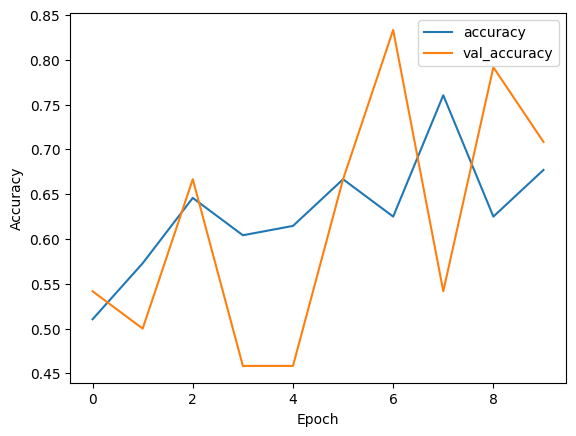

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 112ms/step
Predicted Class: leaf_smut
Confidence: 95.19%


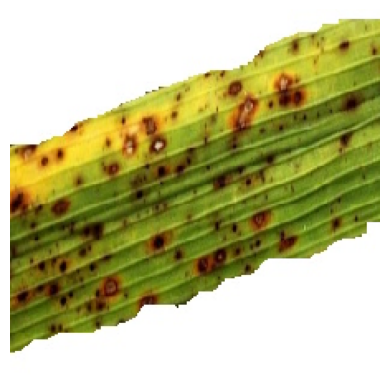

In [ ]:
model_path = '/content/drive/MyDrive/model.h5'
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model(model_path)

test_image_path = '/content/drive/MyDrive/rice_leaf_diseases/Brown spot/DSC_0101.jpg'

img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


predictions = model.predict(img_array)


class_labels = ['bacterial_leaf_blight', 'brown_spot', 'leaf_smut']
predicted_class = class_labels[np.argmax(predictions)]
confidence = predictions[0][np.argmax(predictions)]

print(f'Predicted Class: {predicted_class}')
print(f'Confidence: {confidence * 100:.2f}%')

plt.imshow(img)
plt.axis('off')
plt.show()